##### Below is a template for Asana's early career data science take-home assessment. Although we encourage candidates to use a similar format as below, feel free to make changes as needed!

Write your findings & recommendations as if you are presenting to someone outside of the
data science team (i.e. an engineer or product manager) who will be making decisions
about the initial experience users receive when they first create their accounts. Their work
will focus on improving this experience to increase adoption, so they'd like to know how
successful Asana currently is at getting different types of users to adopt.

### Data Ingestion

In [203]:
# How to read the data files in Python

import pandas as pd

users = pd.read_csv("https://s3.amazonaws.com/asana-data-interview/takehome_users-intern.csv")

user_engagement = pd.read_csv("https://s3.amazonaws.com/asana-data-interview/takehome_user_engagement-intern.csv")

In [204]:
users.head()

,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,email_domain
0,1,4/22/14 3:53,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1.398139e+09,1,0,11,10803.0,yahoo.com
1,2,11/15/13 3:45,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0,gustr.com
2,3,3/19/13 23:14,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,1.363735e+09,0,0,94,1525.0,gustr.com
3,4,5/21/13 8:09,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,1.369210e+09,0,0,1,5151.0,yahoo.com
4,5,1/17/13 10:14,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,1.358850e+09,0,0,193,5240.0,yahoo.com


In [205]:
#rename object_id to user_id for future join
users = users.rename(columns={'object_id': 'user_id'})
users['email'] = users['email'].str.lower()

- object_id - primary key
- creation_time - datetime
- name - string
- email - string
- creation source - string (categorical)
- last session creation time - datetime
- opted_in_to_mailing_list - boolean
- enabled_for_marketing_drip - boolean
- org_id - categorical
- invited_by_user - integer (categorical)
- invited_by_user_id - integer (categorical)
- email_domain (categorical)


In [206]:
users.dtypes

user_id                         int64
creation_time                  object
name                           object
email                          object
creation_source                object
last_session_creation_time    float64
opted_in_to_mailing_list        int64
enabled_for_marketing_drip      int64
org_id                          int64
invited_by_user_id            float64
email_domain                   object
dtype: object

In [207]:
users.invited_by_user_id.isna().sum()


5583

In [208]:
min(users.invited_by_user_id)

3.0

Since the minimum value in the invited_by_user_id column is 3.0. We can fill replace NaN values as 0, before converting the column into a integer type. Then we can fill the 0s with 'None' as a new category.

In [209]:
users['creation_time'] = pd.to_datetime(users['creation_time'])
users['creation_source'] = users['creation_source'].astype('category')
users['org_id'] = users['org_id'].astype('category')
users['opted_in_to_mailing_list'] = users['opted_in_to_mailing_list'].astype(bool)
users['enabled_for_marketing_drip'] = users['enabled_for_marketing_drip'].astype(bool)
users['invited_by_user_id'].fillna(0, inplace=True)
#users['invited_by_user_id'] = users['invited_by_user_id'].astype(int).astype('category')
#users['invited_by_user_id'] = users['invited_by_user_id'].cat.rename_categories({0: 'None'})

/var/folders/y3/1ld116210xs2ztcb6hbqjrhm0000gn/T/ipykernel_59301/2593046733.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  users['creation_time'] = pd.to_datetime(users['creation_time'])


In [210]:
user_engagement.head()

,time_stamp,user_id,visited
0,2014-04-22 03:53:30,1,1
1,2013-11-15 03:45:04,2,1
2,2013-11-29 03:45:04,2,1
3,2013-12-09 03:45:04,2,1
4,2013-12-25 03:45:04,2,1


In [211]:
user_engagement.dtypes

time_stamp    object
user_id        int64
visited        int64
dtype: object

Identifier Columns

Are columns that should be primary keys actually unique? If not, how will you handle duplicate values (keep first value, keep last value, etc.)?

In [212]:
#range of values of visited - only 1 - so we can remove this column
print(max(user_engagement.visited))
print(min(user_engagement.visited))

1
1


In [213]:
import matplotlib.pyplot as plt

Numerical Columns

Plot a histogram of the column values to examine the distribution. Does the distribution look normal/uniform/bimodal/something else?
Are there outliers? For analytics tasks, I generally wouldn’t remove outliers at first, but it’s good to note that they are present.
Are there values that don’t make sense in the context of the problem (e.g. a person with a height of 12 feet, negative $ amounts in some applications)?
Are there missing values? Handling missing data could be a whole post on its own, but this article is a good resource for how to think about it.

Categorical Columns

Compute the frequency of each category. What are the most/least common categories?
Are there categories that could be merged together with some simple text manipulation (e.g. same category name but different cases, clear typos)?
Are there values that don’t make sense in the context of the problem (e.g. order from Russia when you know all orders should be from the US)?
Are there missing values? Handling missing data could be a whole post on its own, but this article is a good resource for how to think about it.

In [214]:
users.invited_by_user_id.value_counts()
print(users.invited_by_user_id.isnull().sum())

0


In [215]:
#users['invited_by_user_id'].value_counts().plot(kind='bar')


<Axes: xlabel='creation_source'>

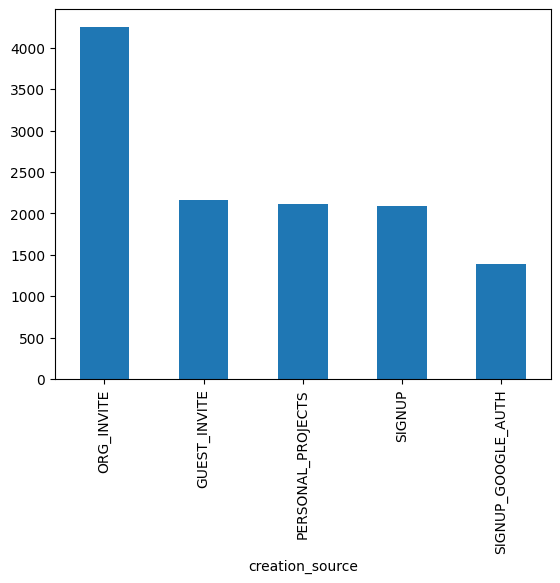

In [216]:
users['creation_source'].value_counts().plot(kind='bar')


In [217]:
print(users.creation_source.isnull().sum())

0


In [218]:
users['email_domain'].value_counts().head(10)

email_domain
gmail.com         3562
yahoo.com         2447
jourrapide.com    1259
cuvox.de          1202
gustr.com         1179
hotmail.com       1165
rerwl.com            2
oqpze.com            2
qgjbc.com            2
dqwln.com            2
Name: count, dtype: int64

In [219]:
# Step 1: Determine the threshold
threshold = 1000

# Step 2: Create a custom function to apply
def group_low_volume_categories(email_domain):
    counts = users['email_domain'].value_counts()
    if counts[email_domain] < threshold:
        return 'Other'
    return email_domain

# Step 3: Apply the custom function to the 'email domain' column
users['email_domain'] = users['email_domain'].apply(group_low_volume_categories)


<Axes: xlabel='email_domain'>

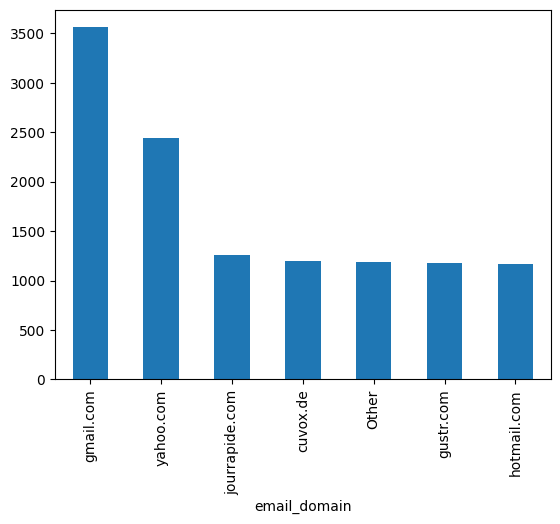

In [220]:
users['email_domain'].value_counts().head(10).plot(kind='bar')

In [221]:
users['email_domain'] = users['email_domain'].astype('category')

Timestamp Columns

Are there gaps in the time series (e.g. missing a whole day or multiple days, days with shockingly low volume)?
Are there missing values? Handling missing data could be a whole post on its own, but this article is a good resource for how to think about it.

In [222]:
users['last_session_creation_time'] = pd.to_datetime(users['last_session_creation_time'])

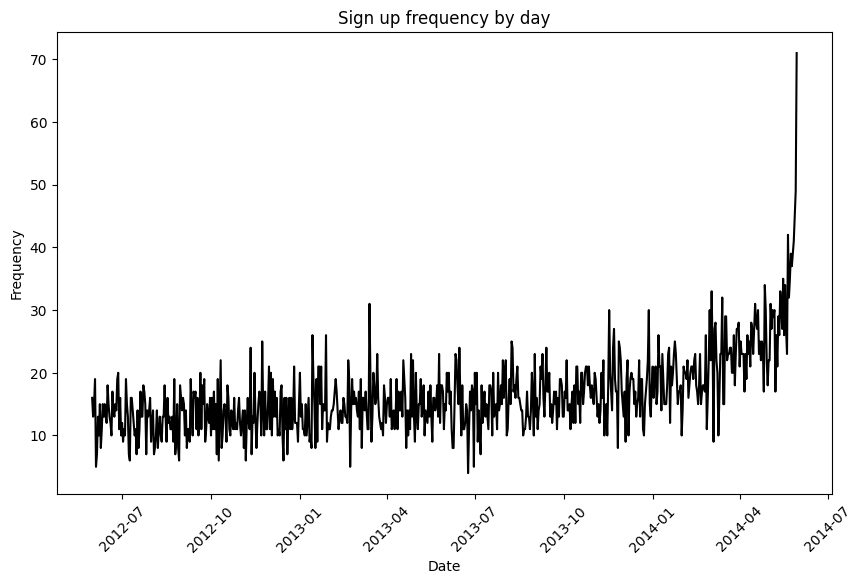

In [223]:
#plot creation_time

# Group by date-time and count the frequency
frequency = users.groupby(users['creation_time'].dt.date)['creation_time'].size()

# Create a bar plot
plt.figure(figsize=(10, 6))
frequency.plot(color='black', linestyle='-')
plt.title('Sign up frequency by day')
plt.xlabel('Date')
plt.ylabel('Frequency')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()

In [224]:
max(users['creation_time'].dt.date.value_counts())

71

In [225]:
#no null values
users.creation_time.isnull().sum()

0

In [226]:
#users.last_session_creation_time not a useful column - should be dropped from the df 
print("min value: ", min(users.last_session_creation_time), "\nmax_value: ", max(users.last_session_creation_time))



min value:  1970-01-01 00:00:01.338452406 
max_value:  1970-01-01 00:00:01.402066730


In [227]:
users = users.drop(columns=['last_session_creation_time'])


In [228]:
#No significant gap in the time series - maximum gap is 19 hours and 18 minutes

from datetime import datetime, timedelta

creation_time_analysis = pd.DataFrame(users)

# Set 'timestamp' as the index
creation_time_analysis.set_index('creation_time', inplace=True)

# Sort the DataFrame by the index (timestamp)
creation_time_analysis.sort_index(inplace=True)

# Calculate time gaps between consecutive timestamps
time_diff = creation_time_analysis.index.to_series().diff()

# Define a threshold for gap detection (e.g., 15 minutes)
gap_threshold = timedelta(minutes=720)

# Find gaps exceeding the threshold
gaps = time_diff[time_diff > gap_threshold]

if not gaps.empty:
    print("Gaps in the time series:")
    print(gaps)
else:
    print("No significant gaps in the time series.")

Gaps in the time series:
creation_time
2012-07-26 22:08:00   0 days 15:36:00
2012-08-05 05:48:00   0 days 14:42:00
2012-08-29 17:02:00   0 days 19:18:00
2012-12-31 04:25:00   0 days 15:33:00
2013-07-07 21:17:00   0 days 14:48:00
Name: creation_time, dtype: timedelta64[ns]


Joining Tables

Once you’ve cleaned your data and need to merge tables together, you’ll want to be very thoughtful about join types. Before joining 2 tables, think about what the output should look like (e.g. should a user have a single order or multiple orders? should users with no orders be included?). If you’ve thought about what the output should look like before joining the data, then you can validate whether the results match your expectations and debug your code if necessary.

### Data Exploration and Cleaning

### 1) Calculating Adoption Rate

In [229]:
user_engagement.head()

,time_stamp,user_id,visited
0,2014-04-22 03:53:30,1,1
1,2013-11-15 03:45:04,2,1
2,2013-11-29 03:45:04,2,1
3,2013-12-09 03:45:04,2,1
4,2013-12-25 03:45:04,2,1


In [230]:
#remove 'visited' column

In [231]:
#use only the user_engagement table to calculate the adoption rate
#convert timestamp into a list 

#create a new df
list_of_users = user_engagement.user_id.unique().tolist()
hMap = {i: [] for i in list_of_users}
for index,row in user_engagement.iterrows():
    hMap[row['user_id']].append(row['time_stamp'])

#sort each login_date in ascending order
#  
user_engagement_revised = pd.DataFrame(list(hMap.items()), columns=['user_id', 'login_dates'])
user_engagement_revised.head()

,user_id,login_dates
0,1,[2014-04-22 03:53:30]
1,2,"[2013-11-15 03:45:04, 2013-11-29 03:45:04, 201..."
2,3,[2013-03-19 23:14:52]
3,4,[2013-05-22 08:09:28]
4,5,[2013-01-22 10:14:20]


In [232]:
# Convert each string in the list to a datetime object using apply and a lambda function
user_engagement_revised['login_dates'] = user_engagement_revised['login_dates'].apply(lambda x: [pd.to_datetime(date_str) for date_str in x])

We define an "adopted user" as a user who has logged into the product on three separate days in at least one seven-day period. Because we believe that adopted users are more likely to be successful at using Asana in the long term than those that are not adopted, we want to know what things are likely indicators of future adoption. 

In [233]:
#should we calculate the adoption rate in the past month, in the past year, in the past two weeks...
#use the subset function to find the adoption rate for a specified duration 
from datetime import timedelta

def has_adopted(dataframe):
    sorted_dates = sorted(dataframe['login_dates'])
    
    # Initialize variables to track consecutive logins and the start date of the current window
    consecutive_logins = 0
    current_start_date = None
    
    # Define the 7-day time window
    seven_days = timedelta(days=7)
    
    list_of_dates = []

    # Iterate through the sorted dates
    for date in sorted_dates:
        if current_start_date is None:
            current_start_date = date
            consecutive_logins = 1
            list_of_dates.append(current_start_date)
        elif date - current_start_date <= seven_days:
            consecutive_logins += 1
            list_of_dates.append(date)
        else:
            current_start_date = date
            list_of_dates = [current_start_date]
            consecutive_logins = 1
        
        if consecutive_logins >= 3:
            print(list_of_dates)
            return True
    
    return False

In [234]:
def adopted_user(dataframe):
    separate_days = 0
    prev_date = None
    list_of_days = []

    for date in dataframe['login_date']:
        if prev_date is None or (date - prev_date) <= timedelta(days=7):
            separate_days += 1
            list_of_days.append(date)
            if separate_days >= 3:
                print(list_of_days)
                list_of_days = []  # Clear the list for the next potential set of consecutive dates
                return True
        else:
            separate_days = 1
        prev_date = date
    return False

In [235]:
if 'login_dates' in user_engagement_revised.columns:
    # If it exists, apply the 'adopted_user' function
    user_engagement_revised['has_adopted'] = user_engagement_revised.apply(has_adopted, axis=1)
else:
    print("The 'login_date' column does not exist in the DataFrame.")

[Timestamp('2014-02-03 03:45:04'), Timestamp('2014-02-08 03:45:04'), Timestamp('2014-02-09 03:45:04')]
[Timestamp('2013-01-30 22:08:03'), Timestamp('2013-02-04 22:08:03'), Timestamp('2013-02-06 22:08:03')]
[Timestamp('2014-03-11 11:46:38'), Timestamp('2014-03-12 11:46:38'), Timestamp('2014-03-13 11:46:38')]
[Timestamp('2014-05-12 06:29:09'), Timestamp('2014-05-14 06:29:09'), Timestamp('2014-05-19 06:29:09')]
[Timestamp('2012-12-24 19:05:07'), Timestamp('2012-12-25 19:05:07'), Timestamp('2012-12-26 19:05:07')]
[Timestamp('2013-03-08 07:13:17'), Timestamp('2013-03-09 07:13:17'), Timestamp('2013-03-11 07:13:17')]
[Timestamp('2012-08-15 11:02:08'), Timestamp('2012-08-18 11:02:08'), Timestamp('2012-08-22 11:02:08')]
[Timestamp('2013-02-13 23:47:15'), Timestamp('2013-02-15 23:47:15'), Timestamp('2013-02-17 23:47:15')]
[Timestamp('2014-03-29 22:56:03'), Timestamp('2014-04-02 22:56:03'), Timestamp('2014-04-05 22:56:03')]
[Timestamp('2013-01-18 16:30:52'), Timestamp('2013-01-24 16:30:52'), Time

In [236]:
pd.set_option('display.max_colwidth', 1)

user_engagement_revised.head()

,user_id,login_dates,has_adopted
0,1,[2014-04-22 03:53:30],False
1,2,"[2013-11-15 03:45:04, 2013-11-29 03:45:04, 2013-12-09 03:45:04, 2013-12-25 03:45:04, 2013-12-31 03:45:04, 2014-01-08 03:45:04, 2014-02-03 03:45:04, 2014-02-08 03:45:04, 2014-02-09 03:45:04, 2014-02-13 03:45:04, 2014-02-16 03:45:04, 2014-03-09 03:45:04, 2014-03-13 03:45:04, 2014-03-31 03:45:04]",True
2,3,[2013-03-19 23:14:52],False
3,4,[2013-05-22 08:09:28],False
4,5,[2013-01-22 10:14:20],False


In [237]:
print((user_engagement_revised['has_adopted'] == True).sum(), (user_engagement_revised['has_adopted'] == False).sum())

1631 7192


3. Segment, Segment, Segment
Segmentation is key to unlocking insights in analytics. The goal of segmentation is to split your data along some dimension so that you can assess performance between different groups. In a product analytics setting, some common segmentations include free vs paid users, device type (desktop web vs mobile web vs native app), traffic source (people coming from search engines, paid marketing, people directly typing in your company’s URL into their browser, etc.), and day of the week.

I tend to try many possible segmentations to see what provides interesting results. If you’re not sure where to start, categorical columns are good candidates for segmentation. Sometimes, you’ll want to filter out low-volume categories or group them into an ‘Other’ category to remove clutter from your visualization.

You can also create boolean columns from numerical ones (e.g. whether a user spent more than $50, if user had activity on the weekend) or discretize columns by creating different buckets (e.g. timestamp to morning/afternoon/ night, order values into buckets of $10–20, $20–30, $30+).

### 2) Methodology

In [238]:
print("There are", len(user_engagement_revised), "user_id listed in user_engagement_revised, and", len(users), "users listed in users.")

There are 8823 user_id listed in user_engagement_revised, and 12000 users listed in users.


In [239]:
#join the two tables together
#if we do an outer join
merged_df = users.merge(user_engagement_revised, on = 'user_id', how = 'outer')

In [240]:
#separate date and time in creation_time as two variables
merged_df['creation_date_year'] = merged_df['creation_time'].dt.year
merged_df['creation_date_month'] = merged_df['creation_time'].dt.month
merged_df['creation_date_day_of_week'] = merged_df['creation_time'].dt.dayofweek
merged_df['creation_date_hour'] = merged_df['creation_time'].dt.hour

In [241]:
pd.reset_option('display.max_colwidth')

merged_df.head()

,user_id,creation_time,name,email,creation_source,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,email_domain,login_dates,has_adopted,creation_date_year,creation_date_month,creation_date_day_of_week,creation_date_hour
0,1,2014-04-22 03:53:00,Clausen August,augustcclausen@yahoo.com,GUEST_INVITE,True,False,11,10803.0,yahoo.com,[2014-04-22 03:53:30],False,2014,4,1,3
1,2,2013-11-15 03:45:00,Poole Matthew,matthewpoole@gustr.com,ORG_INVITE,False,False,1,316.0,gustr.com,"[2013-11-15 03:45:04, 2013-11-29 03:45:04, 201...",True,2013,11,4,3
2,3,2013-03-19 23:14:00,Bottrill Mitchell,mitchellbottrill@gustr.com,ORG_INVITE,False,False,94,1525.0,gustr.com,[2013-03-19 23:14:52],False,2013,3,1,23
3,4,2013-05-21 08:09:00,Clausen Nicklas,nicklassclausen@yahoo.com,GUEST_INVITE,False,False,1,5151.0,yahoo.com,[2013-05-22 08:09:28],False,2013,5,1,8
4,5,2013-01-17 10:14:00,Raw Grace,graceraw@yahoo.com,GUEST_INVITE,False,False,193,5240.0,yahoo.com,[2013-01-22 10:14:20],False,2013,1,3,10


In [242]:
#replace all NaNs in the has_adopted column with False
merged_df['has_adopted'].fillna(False, inplace=True)

In [243]:
merged_df['has_adopted'].isna().sum()

0

If we do an outer join, we notice that it returns a total of 12000 rows, which is equal to the number of rows in users. This means user_engagement_revise does not include users that are not already present in the users dataframe.

##### 2a) Writeup associated with methodology

### 3) What Factors Predict User Adoption?

Because we believe that adopted users are more likely to be successful at using Asana in the long term than those that are not adopted, we want to know what things are likely indicators of future adoption. With this in mind, we'd like you to identify which factors predict user adoption. Applicants generally take on a modeling approach to answer this question, but you may choose whatever method you prefer.

I choose to use the Random Forest model to identify which factors predict user adoption for 3 main reasons:
1. It tells us which feature have the most impact of the model's prediction.
2. It doesn't assume a linear relationship between features and user adoption.
3. It is less prone to overfitting. 

In [255]:
from sklearn.model_selection import train_test_split

xvars = ['creation_date_year', 'creation_date_month', 'creation_date_day_of_week', 'opted_in_to_mailing_list', 'enabled_for_marketing_drip',	
         'org_id', 'creation_date_hour', 'is_invited',
 'creation_source_GUEST_INVITE',
 'creation_source_ORG_INVITE',
 'creation_source_PERSONAL_PROJECTS',
 'creation_source_SIGNUP',
 'creation_source_SIGNUP_GOOGLE_AUTH',
 'email_domain_Other',
 'email_domain_cuvox.de',
 'email_domain_gmail.com',
 'email_domain_gustr.com',
 'email_domain_hotmail.com',
 'email_domain_jourrapide.com',
 'email_domain_yahoo.com' ]
yvar = 'has_adopted'

In [245]:
merged_df.dtypes

user_id                                int64
creation_time                 datetime64[ns]
name                                  object
email                                 object
creation_source                     category
opted_in_to_mailing_list                bool
enabled_for_marketing_drip              bool
org_id                              category
invited_by_user_id                   float64
email_domain                        category
login_dates                           object
has_adopted                             bool
creation_date_year                     int32
creation_date_month                    int32
creation_date_day_of_week              int32
creation_date_hour                     int32
dtype: object

In [246]:
merged_df['is_invited'] = merged_df['invited_by_user_id'] > 0


In [248]:
encoded_df.columns.tolist()

['user_id',
 'creation_time',
 'name',
 'email',
 'opted_in_to_mailing_list',
 'enabled_for_marketing_drip',
 'org_id',
 'invited_by_user_id',
 'login_dates',
 'has_adopted',
 'creation_date_year',
 'creation_date_month',
 'creation_date_day_of_week',
 'creation_date_hour',
 'is_invited',
 'creation_source_GUEST_INVITE',
 'creation_source_ORG_INVITE',
 'creation_source_PERSONAL_PROJECTS',
 'creation_source_SIGNUP',
 'creation_source_SIGNUP_GOOGLE_AUTH',
 'email_domain_Other',
 'email_domain_cuvox.de',
 'email_domain_gmail.com',
 'email_domain_gustr.com',
 'email_domain_hotmail.com',
 'email_domain_jourrapide.com',
 'email_domain_yahoo.com']

In [247]:
encoded_df = pd.get_dummies(merged_df, columns=['creation_source', 'email_domain'])


In [249]:
#check if there are any NA values in each column
for variable in xvars:
    if merged_df[variable].isna().any():
        print(variable, ":", merged_df[variable].isna().sum())
    else:
        print(variable, "does not have NaN values")


creation_date_year does not have NaN values
creation_date_month does not have NaN values
creation_date_day_of_week does not have NaN values
creation_source does not have NaN values
opted_in_to_mailing_list does not have NaN values
enabled_for_marketing_drip does not have NaN values
org_id does not have NaN values
invited_by_user_id does not have NaN values
email_domain does not have NaN values
creation_date_hour does not have NaN values


We will keep the NaNs in the login_date

In [256]:
df_to_fit = encoded_df[xvars+[yvar]].dropna()

X_train, X_test, y_train, y_test = train_test_split(
    df_to_fit[xvars], df_to_fit[yvar], test_size = 0.25, random_state = 1)

print(len(X_train), len(y_train) )
print(len(X_test), len(y_test) )

9000 9000
3000 3000


#### I am going to use RandomizedSearchCV to apply K-fold Cross Validation to come up with the final validation metrics with the model.

For random forests, the parameters I tune are the 
- number of trees, 
- max # of features, 
- depth, 
- min # of samples in a leaf, and 
- min # of samples to split a node. 

If your model is overfitting, reducing the tree depth, min # of samples in a leaf, and min # of samples to split a node should have a regularizing effect.

In [275]:
from sklearn.model_selection import RandomizedSearchCV
import numpy as np
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 50, stop = 1000, num = 20)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
pprint(random_grid)

{'bootstrap': [True, False],
 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [50,
                  100,
                  150,
                  200,
                  250,
                  300,
                  350,
                  400,
                  450,
                  500,
                  550,
                  600,
                  650,
                  700,
                  750,
                  800,
                  850,
                  900,
                  950,
                  1000]}


In [277]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()

# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
rf_random.fit(X_train, y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits
[CV] END bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=150; total time=   1.8s
[CV] END bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=150; total time=   2.0s
[CV] END bootstrap=True, max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=250; total time=   0.0s
[CV] END bootstrap=True, max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=250; total time=   0.0s
[CV] END bootstrap=True, max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=250; total time=   0.0s
[CV] END bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=150; total time=   1.2s
[CV] END bootstrap=False, max_depth=70, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators

/Users/opheliasin/asana_summer2024_dsintern_takehome/myenv/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:425: FitFailedWarning: 
120 fits failed out of a total of 300.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
96 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/opheliasin/asana_summer2024_dsintern_takehome/myenv/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 729, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/opheliasin/asana_summer2024_dsintern_takehome/myenv/lib/python3.9/site-packages/sklearn/base.py", line 1145, in wrapper
    estimator._validate_params()
  File "/Users/opheliasin/asana_summer2024_dsintern_

RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110,
                                                      None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [50, 100, 150, 200, 250,
                                                         300, 350, 400, 450,
                                                         500, 550, 600, 650,
                                                         700, 750, 800, 850,
                                                         900, 950, 1000]},
                   random_state=42, verbose=2)

In [278]:
rf_random.best_params_

{'n_estimators': 50,
 'min_samples_split': 10,
 'min_samples_leaf': 2,
 'max_features': 'sqrt',
 'max_depth': 110,
 'bootstrap': True}

In [283]:
def evaluate(model, test_features, test_labels):
    predictions = model.predict(test_features)
    errors = abs(predictions ^ test_labels)

    mape = 100 * np.mean(predictions.astype(int) ^ test_labels.astype(int))
    accuracy = 100 - mape
    print('Model Performance')
    print('Average Error: {:0.5f} degrees.'.format(np.mean(errors)))
    print('Accuracy = {:0.5f}%.'.format(accuracy))
    
    return accuracy

base_model = RandomForestClassifier(n_estimators = 10, random_state = 42)
base_model.fit(X_train, y_train)
base_accuracy = evaluate(base_model, X_train, y_train)

best_random = rf_random.best_estimator_
random_accuracy = evaluate(best_random, X_train, y_train)

print('Improvement of {:0.5f}%.'.format( 100 * (random_accuracy - base_accuracy) / base_accuracy))

Model Performance
Average Error: 0.02367 degrees.
Accuracy = 97.63333%.
Model Performance
Average Error: 0.13067 degrees.
Accuracy = 86.93333%.
Improvement of -10.95937%.


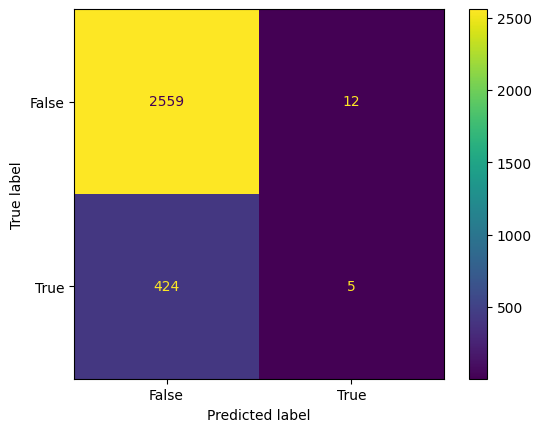

In [261]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_predictions(y_test, y_pred)

In [264]:
print('Accuracy score: {:.4f}'.format(accuracy_score(y_test, y_pred)))


Accuracy score: 0.8547


Text(0, 0.5, 'Mean decrease in impurity')

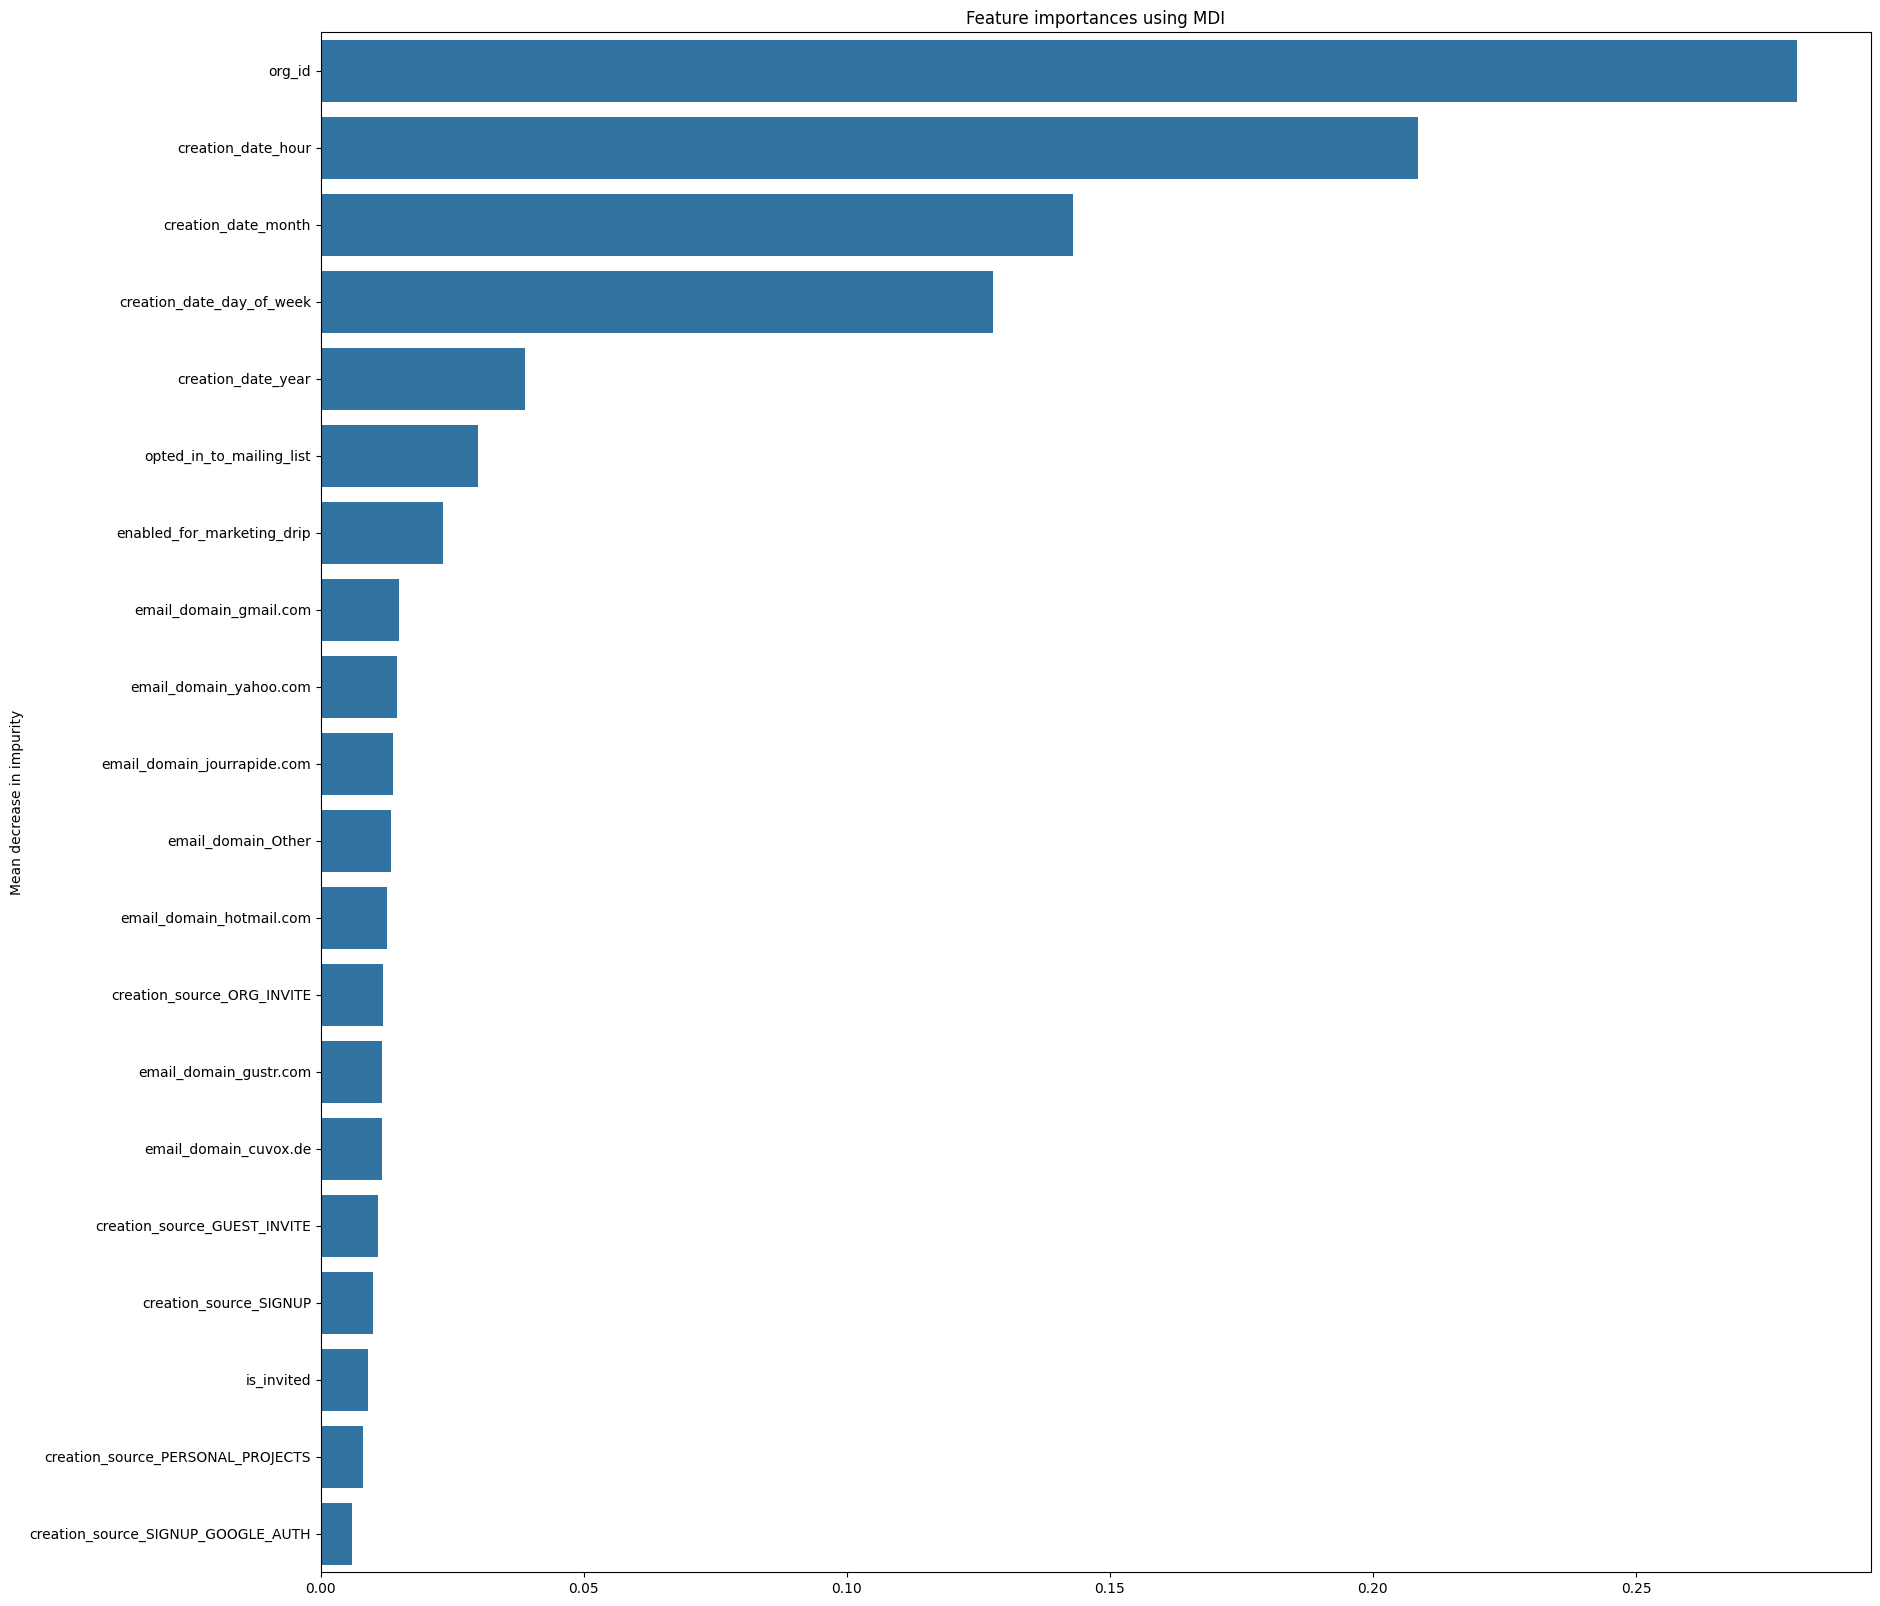

In [267]:
import numpy as np
import seaborn as sns

importances = rf.feature_importances_
forest_importances = pd.Series(importances, index=X_train.columns)
std = np.std([tree.feature_importances_ for tree in rf.estimators_], axis=0)
forest_importances.sort_values(inplace=True, ascending=False)

fig, ax = plt.subplots(figsize = (20,20))
sns.barplot(x=forest_importances.values, y=forest_importances.index, ax=ax)
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")

##### 3a) Writeup associated with what factors predict user adoption?

### 4) Findings and Recommendation